In [1]:
modeln_list=['0.7781_0_0_12_13_07_41_24','0.7776_0_1_12_13_09_55_54',
            '0.7774_0_2_12_13_12_08_53','0.7779_0_3_12_13_14_26_05',
            '0.7785_0_4_12_13_16_42_24','0.7771_0_5_12_13_18_55_11',
            '0.7774_0_6_12_13_21_08_34','0.778_0_7_12_13_23_21_01',
            '0.7773_0_8_12_14_01_33_06','0.7781_0_9_12_14_03_45_10']

In [3]:
import joblib
import pandas as pd
nono=['click']
df_test_user_doc=pd.read_pickle('../../data/wj/df_test_user_doc_64.pkl')
x_columns_0 = [x for x in df_test_user_doc.columns if x not in nono]
X_0 = df_test_user_doc[x_columns_0]      # 样本

test_preds_l=[]
for modeln in modeln_list:
    gbm = joblib.load('../../data/wj/gbdt_best/gbm_'+modeln+'.model')
    y_pre_0=gbm.predict_proba(X_0)[:, 1]
    test_preds_l.append(y_pre_0)
    
import numpy as np
test_preds_l=np.array(test_preds_l)
print(test_preds_l.shape)
test_preds_l=np.average(test_preds_l, axis=0)
print(test_preds_l.shape)

(10, 50000)
(50000,)


In [5]:
table=pd.DataFrame(test_preds_l)
import time
end=time.time()
table.to_csv('../../data/wj/gbdt_result/gbdt_result10fen_'+str(end)+'.csv',header=0)

               feature_name  importance
20        userid_click_mean    0.706473
24         docid_click_mean    0.166776
3                   refresh    0.056479
43       refresh_click_mean    0.021283
45    refresh_duration_mean    0.015375
44      refresh_click_count    0.009133
25        docid_click_count    0.006979
26      docid_duration_mean    0.006651
21       userid_click_count    0.004826
22     userid_duration_mean    0.001982
23       userid_picnum_mean    0.000802
35  category2nd_picnum_mean    0.000793
28   category1st_click_mean    0.000417
32   category2nd_click_mean    0.000319
36      keyword0_click_mean    0.000276
13              category2nd    0.000221
56         city_click_count    0.000175
1                     docid    0.000131
31  category1st_picnum_mean    0.000130
27        docid_picnum_mean    0.000127


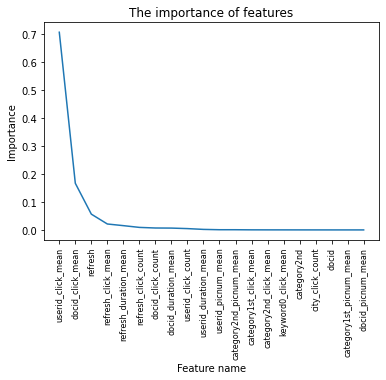

In [6]:
gbm = joblib.load('../../data/wj/gbdt_best/gbm_'+'0.7785_0_4_12_13_16_42_24'+'.model')

import matplotlib.pyplot as plt
def plot_feature_importance(dataset, model_bst):
    list_feature_name = list(dataset.columns[:])
    # list_feature_importance = list(model_bst.feature_importance(importance_type='split', iteration=-1))
    list_feature_importance = list(model_bst.feature_importances_)
    dataframe_feature_importance = pd.DataFrame(
        {'feature_name': list_feature_name, 'importance': list_feature_importance})
    dataframe_feature_importance20 = dataframe_feature_importance.sort_values(by='importance', ascending=False)[:20]
    print(dataframe_feature_importance20)
    x = range(len(dataframe_feature_importance20['feature_name']))
    plt.xticks(x, dataframe_feature_importance20['feature_name'], rotation=90, fontsize=8)
    plt.plot(x, dataframe_feature_importance20['importance'])
    plt.xlabel("Feature name")
    plt.ylabel("Importance")
    plt.title("The importance of features")
    plt.show()


# gbm6 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=160,max_depth=7, min_samples_leaf =60,
#                    min_samples_split =1200, max_features=9, subsample=0.7, random_state=2019)

# gbm6.fit(x_train, y_train)

plot_feature_importance(X_0, gbm)
